In [173]:
%matplotlib inline  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [174]:
up_df=pd.read_excel('up_gene_count_ID.xls')

In [175]:
up_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 8 columns):
Expr Intensity/RPKM/FPKM/Counts    815 non-null int64
ID                                 815 non-null int64
Flags                              815 non-null object
Symbol                             815 non-null object
Entrez Gene Name                   815 non-null object
Location                           815 non-null object
Type(s)                            815 non-null object
Drug(s)                            815 non-null object
dtypes: int64(2), object(6)
memory usage: 51.0+ KB


In [176]:
up_df.columns=['count','ID', 'flags', 'symbol', 'GeneName', 'location','type', 'drug']

In [177]:
up_df.head()

,count,ID,flags,symbol,GeneName,location,type,drug
0,3,1906,,EDN1,endothelin 1,Extracellular Space,cytokine,
1,8,3553,,IL1B,interleukin 1 beta,Extracellular Space,cytokine,"canakinumab, gevokizumab, canakinumab/INS, gal..."
2,9,200734,,SPRED2,sprouty related EVH1 domain containing 2,Extracellular Space,cytokine,
3,10,6696,,SPP1,secreted phosphoprotein 1,Extracellular Space,cytokine,
4,14,10451,,VAV3,vav guanine nucleotide exchange factor 3,Extracellular Space,cytokine,


In [178]:
up_types=up_df['type'].unique()

In [179]:
up_types

array(['cytokine', 'enzyme', 'G-protein coupled receptor', 'growth factor',
       'ion channel', 'kinase', 'ligand-dependent nuclear receptor',
       'other', 'peptidase', 'phosphatase', 'transcription regulator',
       'translation regulator', 'transmembrane receptor', 'transporter'], dtype=object)

In [180]:
counts = up_df.groupby('type').agg({'count': 'sum'})

In [181]:
counts

,count
type,
G-protein coupled receptor,103
cytokine,135
enzyme,1845
growth factor,34
ion channel,51
kinase,1132
ligand-dependent nuclear receptor,35
other,2717
peptidase,346


In [183]:
up=up_df.groupby('type').agg({'count': 'sum'})

In [ ]:
percentage=up['count']/up['count'].sum()*100

In [ ]:
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(up.index.values,percentage)]

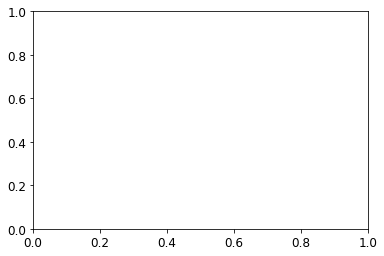

In [351]:
fig, ax = plt.subplots()

In [362]:
patches, texts = ax.pie(up['count'], labels=labels, labeldistance=1.2, radius=0.4)

In [363]:
ax.axis('equal')
ax.tick_params(labelsize=12)

In [364]:
for t in texts:
    t.set_size('large')

In [365]:
plt.draw()

In [366]:
plt.show()

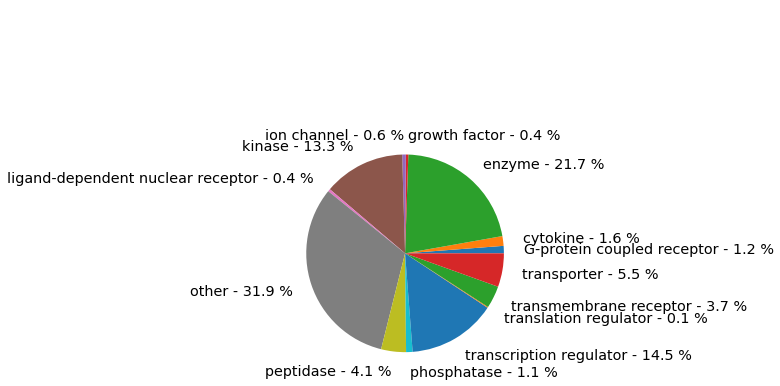

In [367]:
fig

In [368]:

fig.set_size_inches(13, 4)
fig.savefig('up_regulated_genes_test0.png', dpi=600 )

In [ ]:
labels

In [ ]:
fig, ax = plt.subplots()

In [ ]:
ax.pie(up['count'], labels=labels)

In [ ]:
ax.axis('equal')

In [ ]:
fig

In [ ]:
fig.tight_layout()
plt.draw()

In [ ]:
fig

In [ ]:
fig.set_size_inches(4, 4,forward=False)
fig.savefig('up_regulated_genes_type_percent.png', dpi=600 )

In [ ]:
pie=up_df.groupby('type').agg({'count': 'sum'}).plot.pie(y='count', legend = False, figsize=(4, 4),labels=labels, ).set_ylabel('')

In [ ]:
fig = pie.get_figure()
fig.tight_layout()
fig.set_size_inches(4, 4,forward=True)
fig.tight_layout()
plt.gcf().subplots_adjust(left=0.15)
#fig.set_position([0.4, 0, 0.5, 0.5])
fig.savefig('up_regulated_genes_type_percent.png', dpi=600 )

In [ ]:
dn_df=pd.read_excel('dn_gen_count_ID.xls')

In [ ]:
dn_df.head()

In [ ]:
dn_df.columns=['count','ID', 'flags', 'symbol', 'GeneName', 'location','type', 'drug']

In [ ]:
percentage=up['count']/up['count'].sum()*100

In [ ]:
#pie.legend( up.index.values, loc='best')


labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(up.index.values,percentage)]



In [ ]:
pie=dn_df.groupby('type').agg({'count': 'sum'}).plot.pie(y='count', legend = False,figsize=(5, 5),autopct='%1.1f%%').set_ylabel('')

In [ ]:
fig = pie.get_figure()
fig.set_size_inches(13, 9)
fig.savefig('dn_regulated_genes_type.png', dpi=600 )

In [ ]:
pie=dn_df.groupby('location').agg({'count': 'sum'}).plot.pie(y='count', legend = False,figsize=(5, 5),autopct='%1.1f%%' ).set_ylabel('')

In [ ]:
fig = pie.get_figure()
fig.set_size_inches(13, 9)
fig.savefig('dn_regulated_genes_location.png', dpi=600 )